##study of dataset--names of each column,type of data i.e. number or words,missing values,

##unique values  --medal,sport,country

import pandas as pd



df=pd.read_csv('/kaggle/input/shruti/Olympic_Athlete_Event_Results (1).csv',encoding='ISO-8859-1',on_bad_lines='skip')



print("First few rows of the dataset:")

display(df.head())



print("Dataset Information:")

df.info()



print("Missing Values Count:")

missing_values = df.isnull().sum()

display(missing_values[missing_values > 0])



print("Statistical Summary for Numerical Colums:")

display(df.describe())



# Displaying basic statistical summary for categorical columns (like 'Event', 'Medal', etc.)

print("\nUnique Values in Each Column:")

for column in df.select_dtypes(include='object').columns:

    print(f"{column}: {df[column].nunique()} unique values")



# Check for unique categories in key columns (like 'Medal', 'Sport', etc.)

print("\nUnique Categories in Key Columns:")

print("Medal:", df['Medal'].unique())

print("Sport:", df['Sport'].unique())

print("Country:", df['Country'].unique())


In [2]:
##tells us about the number of rows and columns

print(df.shape)

(213020, 18)


In [3]:
## As we can see that there are some misalignment in dataset

## the first task is to solve the misalignment problem by deleting those rows



## step 1: Drop rows where in column isTeamsport contain value other than true or false

# Drop rows where 'isTeamSport' is not exactly True or False

df_cleaned = df[df['isTeamSport'].isin(['TRUE','FALSE'])]

print(df_cleaned.shape)



print("Droping Unamed Columns .")

df_cleaned = df_cleaned.drop(columns=[col for col in df.columns if 'Unnamed' in col])



print(df_cleaned.shape)



## Droping rows with missing value of pos and country

df_cleaned = df_cleaned.dropna(subset=['pos', 'Country','Born'])



## Checking the missing values

print("Missing Values Count:")

missing_values = df_cleaned.isnull().sum()

print(missing_values)



# Displaying basic statistical summary for categorical columns (like 'Event', 'Medal', etc.)

print("\nUnique Values in Each Column:")

for column in df_cleaned.select_dtypes(include='object').columns:

    print(f"{column}: {df_cleaned[column].nunique()} unique values")

print(df_cleaned.shape)

# Check for unique categories in key columns (like 'Medal', 'Sport', etc.)

print("\nUnique Categories in Key Columns:")

print("Medal:", df_cleaned['Medal'].unique())

print("Sport:", df_cleaned['Sport'].unique())

print("Country:", df_cleaned['Country'].unique())

print("Edition ID:", df_cleaned['edition_id'].unique())

print("Athlete ID:", df_cleaned['athlete_id'].unique())

print("Height:", df_cleaned['Height'].unique())

print("Weight:", df_cleaned['Weight'].unique())


(32095, 18)
Droping Unamed Columns .
(32095, 15)
Missing Values Count:
Games              0
edition_id         0
NOC                0
Sport              0
Event              0
result_id          0
Name               0
athlete_id         0
pos                0
Medal          27445
isTeamSport        0
Height           481
Weight           481
Born               0
Country            0
dtype: int64

Unique Values in Each Column:
Games: 5 unique values
NOC: 204 unique values
Sport: 57 unique values
Event: 362 unique values
Name: 20191 unique values
athlete_id: 20188 unique values
pos: 552 unique values
Medal: 3 unique values
isTeamSport: 2 unique values
Weight: 210 unique values
Born: 7660 unique values
Country: 202 unique values
(31943, 15)

Unique Categories in Key Columns:
Medal: [nan 'Gold' 'Silver' 'Bronze']
Sport: ['Archery' 'Artistic Gymnastics' 'Athletics' 'Badminton'
 'Beach Volleyball' 'Boxing' 'Canoe Sprint' 'Cycling Mountain Bike'
 'Cycling Road' 'Diving' 'Equestrian Dressage' 

In [4]:
## As we can see there in some rows range of weight is given and the dtype of weight and height is object we will convert

## it into numerict value

def clean_and_convert(column):

    def convert_range(value):

        # Ensure the value is treated as a string

        value = str(value)

        if '-' in value:  # Check for a range

            low, high = map(float, value.split('-'))

            return (low + high) / 2

        elif value.replace('.', '', 1).isdigit():  # Check if it’s a single numeric value

            return float(value)

        return None  # For values that cannot be converted



    # Apply the function and convert to numeric

    return pd.to_numeric(column.apply(convert_range), errors='coerce')



# Apply the function to 'Height' and 'Weight' columns

df_cleaned['Height'] = clean_and_convert(df_cleaned['Height'])

df_cleaned['Weight'] = clean_and_convert(df_cleaned['Weight'])



## Cheking unique value in weight and height

print("Height:", df_cleaned['Height'].unique())

print("Weight:", df_cleaned['Weight'].unique())



print("Dataset Information:")

df_cleaned.info()

Height: [177. 179. 197. 152. 167. 182. 171. 181. 188. 180. 192. 170. 178. 162.
 195. 187. 184. 190. 165. 185. 173. 186. 193. 169. 168. 166. 163. 189.
 172. 176. 174. 160. 164.  nan 158. 196. 191. 200. 159. 183. 154. 147.
 175. 203. 155. 206. 213. 208. 205. 157. 198. 209. 204. 194. 201. 161.
 153. 150. 199. 156. 151. 202. 217. 210. 207. 145. 138. 149. 218. 212.
 211. 140. 215. 216. 142. 214. 141. 148. 146. 144. 226. 137. 139. 219.]
Weight: [ 84.   80.   48.   75.   54.   71.   74.   78.   85.   73.   62.   65.
  83.   66.   57.   98.   82.   64.   90.   86.   70.   61.   77.   89.
  63.   60.   56.   50.   67.   52.   55.   72.   58.   59.    nan  91.
  68.   97.  102.   81.   79.   95.   92.   88.   76.   87.  130.   44.
  43.   69.  120.  129.  147.  109.  136.  122.  111.  125.   47.   51.
  49.  100.  117.  104.  114.  115.   96.  113.   99.   93.  107.   53.
 103.   94.  105.  108.  161.   38.   46.   94.5  41.   72.5  45.   81.5
  88.5  87.5  79.5  73.5  56.5 116.  101.   78.5 110

In [5]:
# Missing Data Handling.

missing_data_percentage = (df_cleaned.isnull().sum() / len(df)) * 100

print("Missing Data Percentage in each Column:\n", missing_data_percentage)

Missing Data Percentage in each Column:
 Games           0.000000
edition_id      0.000000
NOC             0.000000
Sport           0.000000
Event           0.000000
result_id       0.000000
Name            0.000000
athlete_id      0.000000
pos             0.000000
Medal          12.883767
isTeamSport     0.000000
Height          0.225800
Weight          0.235189
Born            0.000000
Country         0.000000
dtype: float64


In [6]:
## Cleaning the data and handling missing values



## replacing the nan value in height and weight with median according to there sports

# Group by 'Sport' and calculate the median height for each sport

median_height_by_sport = df_cleaned.groupby('Sport')['Height'].transform('median')



# Replace NaN values in 'Height' with the median height of their respective sport

df_cleaned['Height'].fillna(median_height_by_sport)



# Group by 'Sport' and calculate the median weight for each sport

median_weight_by_sport = df_cleaned.groupby('Sport')['Weight'].transform('median')



# Replace NaN values in 'Weight' with the median weight of their respective sport

df_cleaned['Weight'].fillna(median_weight_by_sport)



## Replacing the nan value in medal with no Medal

df_cleaned['Medal'] = df_cleaned['Medal'].fillna('No Medal')



## Checking nan value

print(df_cleaned.isnull().sum())


Games            0
edition_id       0
NOC              0
Sport            0
Event            0
result_id        0
Name             0
athlete_id       0
pos              0
Medal            0
isTeamSport      0
Height         481
Weight         501
Born             0
Country          0
dtype: int64


In [8]:
df_cleaned=df_cleaned.dropna(subset=['Height','Weight'])

print(df_cleaned.isnull().sum())

print(df_cleaned.shape)



# Save the cleaned DataFrame

df_cleaned.to_csv('/kaggle/input/shruti/Cleaned_Olympic_Athlete_Event_Results.csv', index=False)


Games          0
edition_id     0
NOC            0
Sport          0
Event          0
result_id      0
Name           0
athlete_id     0
pos            0
Medal          0
isTeamSport    0
Height         0
Weight         0
Born           0
Country        0
dtype: int64
(31442, 15)


OSError: [Errno 30] Read-only file system: '/kaggle/input/shruti/Cleaned_Olympic_Athlete_Event_Results.csv'

In [9]:
## addig new column in dataframe

## Adding age of an athelete and and bmi from height and weight



## Age

# Step 1: Extract the Olympic year

df_cleaned['Olympic_Year'] = df_cleaned['Games'].str.extract(r'(\d{4})')[0].astype(float)



# Step 2: Clean and convert the 'Born' column to datetime

df_cleaned['Born'] = pd.to_datetime(df_cleaned['Born'], format='%d-%m-%Y', errors='coerce')



# Step 3: Extract the birth year

df_cleaned['Birth_Year'] = df_cleaned['Born'].dt.year.astype(float)



# Step 4: Calculate age by subtracting birth year from Olympic year

df_cleaned['Age'] = df_cleaned['Olympic_Year'] - df_cleaned['Birth_Year']



# Step 5: Calculating BMI

df_cleaned['BMI'] = df_cleaned['Weight'] / ((df_cleaned['Height']/100) ** 2)



# Step 6: Remove rows with negative ages

df_cleaned = df_cleaned[df_cleaned['Age'] >= 0]



print(df_cleaned.head)


<bound method NDFrame.head of                        Games  edition_id  NOC             Sport  \
131072  2004 Summer Olympics        26.0  SWE           Archery   
131073  2004 Summer Olympics        26.0  SWE           Archery   
131074  2004 Summer Olympics        26.0  SWE           Archery   
131075  2004 Summer Olympics        26.0  SWE           Archery   
131076  2004 Summer Olympics        26.0  SWE           Archery   
...                      ...         ...  ...               ...   
163831  2012 Summer Olympics        54.0  GBR  Beach Volleyball   
163832  2012 Summer Olympics        54.0  GBR  Beach Volleyball   
163835  2012 Summer Olympics        54.0  GBR            Boxing   
163836  2012 Summer Olympics        54.0  GBR            Boxing   
163837  2012 Summer Olympics        54.0  GBR            Boxing   

                          Event  result_id              Name athlete_id pos  \
131072          Individual, Men    41271.0  Magnus Petersson       2143  23   
131073 

In [32]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the features and create new columns for scaled values
df_cleaned.loc[:, ['Scaled_Height', 'Scaled_Weight', 'Scaled_BMI', 'Scaled_Age']] = scaler.fit_transform(
    df_cleaned[['Height', 'Weight', 'BMI', 'Age']]
)

# Display to confirm new columns are created
print(df_cleaned[['Height', 'Scaled_Height', 'Weight', 'Scaled_Weight', 'BMI', 'Scaled_BMI', 'Age', 'Scaled_Age']].head())

# Save the DataFrame to a writable directory
df_cleaned.to_csv('/kaggle/working/Scaled_Olympic_Athlete_Event_Results.csv', index=False)

# Load the saved file to confirm it saved correctly
df_scaled = pd.read_csv('/kaggle/working/Scaled_Olympic_Athlete_Event_Results.csv')


        Height  Scaled_Height  Weight  Scaled_Weight        BMI  Scaled_BMI  \
131072   177.0       0.114250    84.0       0.855596  26.812219    1.301987   
131073   179.0       0.298806    80.0       0.591135  24.968010    0.705337   
131074   197.0       1.959808    80.0       0.591135  20.613775   -0.703370   
131075   179.0       0.298806    80.0       0.591135  24.968010    0.705337   
131076   197.0       1.959808    80.0       0.591135  20.613775   -0.703370   

         Age  Scaled_Age  
131072  29.0    0.468841  
131073  25.0   -0.255314  
131074  23.0   -0.617392  
131075  25.0   -0.255314  
131076  23.0   -0.617392  


In [33]:
print("Medal" in df_scaled.columns)



print(df_scaled['Medal'].unique())

True
['No Medal' 'Gold' 'Silver' 'Bronze']


In [34]:
# Map the 'Medal' column: 1 for "Gold", "Silver", "Bronze" and 0 for "No Medal"

df_scaled['Medal_Indicator'] = df_scaled['Medal'].apply(lambda x: 0 if x == "No Medal" else 1)


In [35]:
print(df_scaled.columns)

Index(['Games', 'edition_id', 'NOC', 'Sport', 'Event', 'result_id', 'Name',
       'athlete_id', 'pos', 'Medal', 'isTeamSport', 'Height', 'Weight', 'Born',
       'Country', 'Olympic_Year', 'Birth_Year', 'Age', 'BMI', 'Scaled_Height',
       'Scaled_Weight', 'Scaled_BMI', 'Scaled_Age', 'Medal_Indicator'],
      dtype='object')


In [36]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31440 entries, 0 to 31439
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Games            31440 non-null  object 
 1   edition_id       31440 non-null  float64
 2   NOC              31440 non-null  object 
 3   Sport            31440 non-null  object 
 4   Event            31440 non-null  object 
 5   result_id        31440 non-null  float64
 6   Name             31440 non-null  object 
 7   athlete_id       31440 non-null  int64  
 8   pos              31440 non-null  object 
 9   Medal            31440 non-null  object 
 10  isTeamSport      31440 non-null  bool   
 11  Height           31440 non-null  float64
 12  Weight           31440 non-null  float64
 13  Born             31440 non-null  object 
 14  Country          31440 non-null  object 
 15  Olympic_Year     31440 non-null  float64
 16  Birth_Year       31440 non-null  float64
 17  Age         

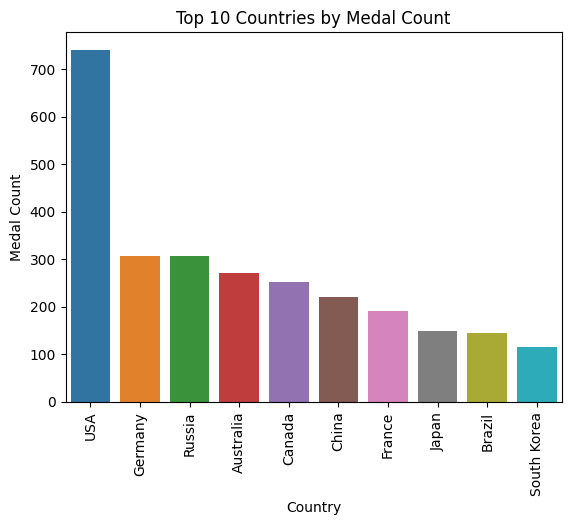

In [37]:
## EDA

import matplotlib.pyplot as plt

import seaborn as sns



top_countries = df_scaled[df_scaled['Medal'] != 'No Medal']['Country'].value_counts().head(10)

sns.barplot(x=top_countries.index, y=top_countries.values)

plt.xticks(rotation=90)

plt.title('Top 10 Countries by Medal Count')

plt.xlabel('Country')

plt.ylabel('Medal Count')

plt.show()


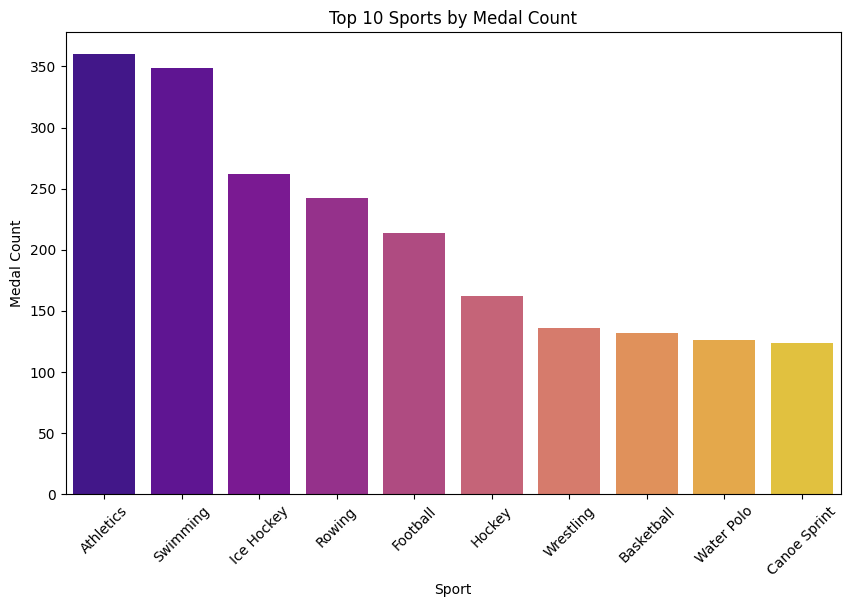

In [38]:
# Medal distribution by sport (Top 10 sports by medal count)

plt.figure(figsize=(10, 6))

top_sports = df_scaled[df_scaled['Medal'] != 'No Medal']['Sport'].value_counts().head(10)

sns.barplot(x=top_sports.index, y=top_sports.values, palette='plasma')

plt.title('Top 10 Sports by Medal Count')

plt.xlabel('Sport')

plt.ylabel('Medal Count')

plt.xticks(rotation=45)

plt.show()

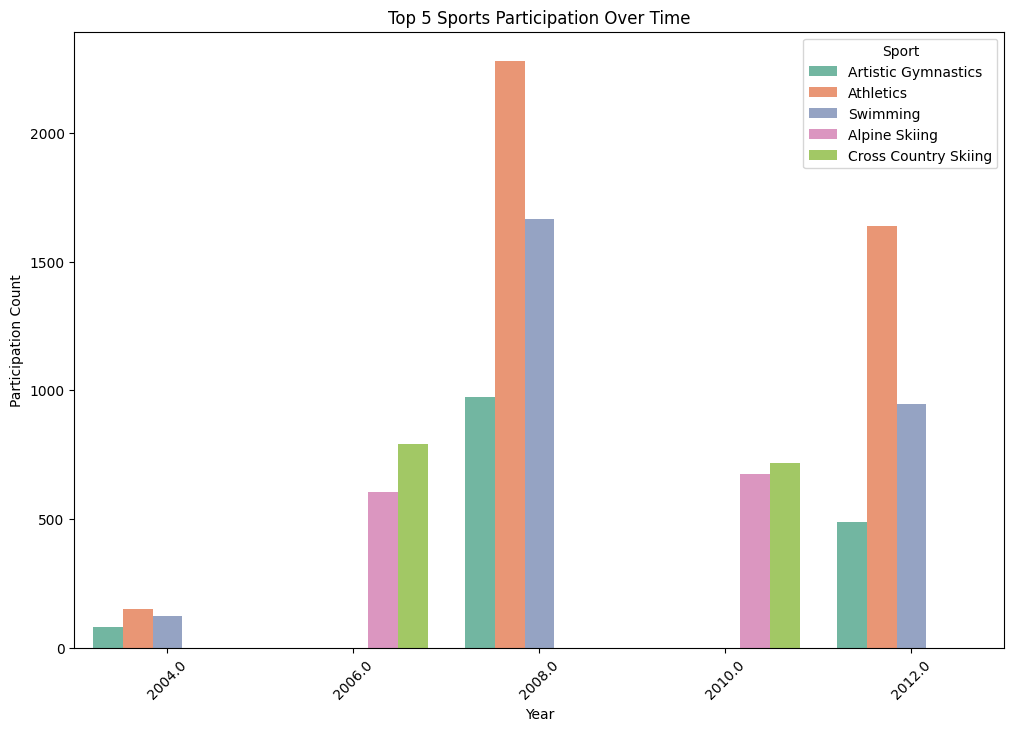

In [39]:
# Participation by sport over time (Top 5 sports with most participation)

top_sports_participation = df['Sport'].value_counts().head(5).index

df_top_sports = df_scaled[df_scaled['Sport'].isin(top_sports_participation)]

plt.figure(figsize=(12, 8))

sns.countplot(data=df_top_sports, x='Olympic_Year', hue='Sport', palette='Set2')

plt.title('Top 5 Sports Participation Over Time')

plt.xlabel('Year')

plt.ylabel('Participation Count')

plt.xticks(rotation=45)

plt.legend(title='Sport')

plt.show()

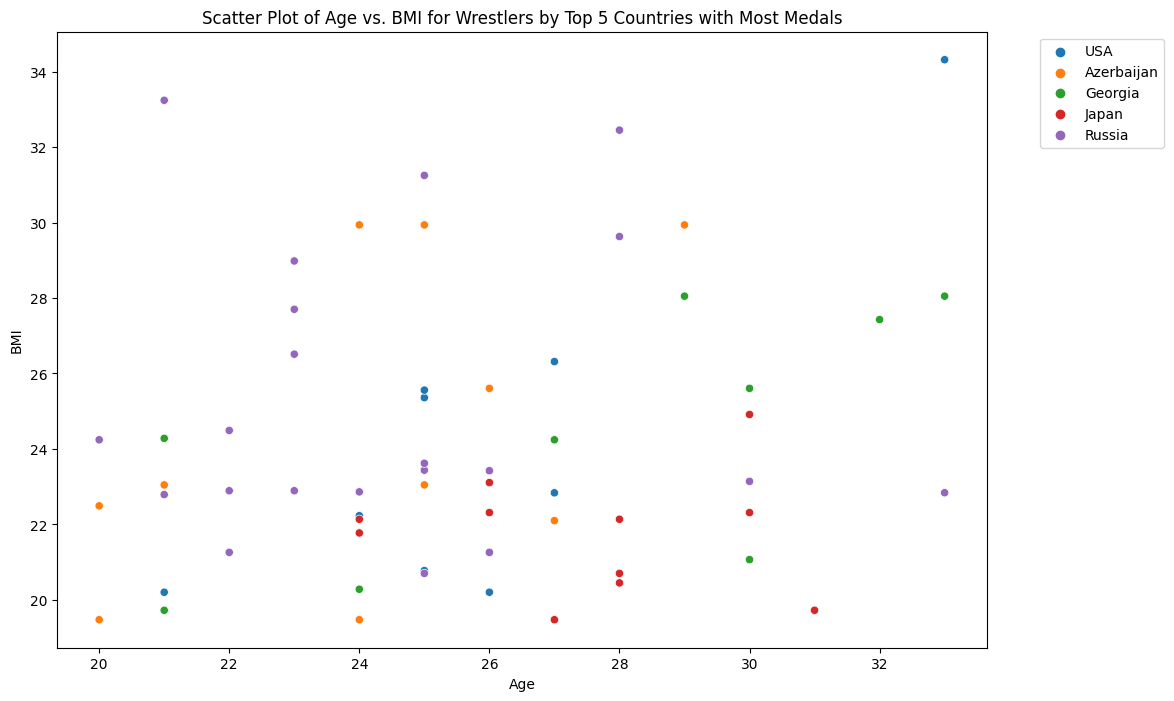

In [40]:
# This graph is to plot Age vs Bmi for wrestler for top 5 countries



# Step 1: Filter data for wrestling and where a medal was won

wrestling_medal_data = df_scaled[(df_scaled['Sport'] == 'Wrestling') & (df_scaled['Medal'] != 'No Medal')]



# Step 2: Get the top 5 countries in wrestling based on the number of medals won

top_5_wrestling_countries = wrestling_medal_data['Country'].value_counts().nlargest(5).index



# Step 3: Filter the original wrestling data to only include these top 5 countries

top_5_wrestling_data = wrestling_medal_data[wrestling_medal_data['Country'].isin(top_5_wrestling_countries)]



# Step 4: Plot Age vs. BMI for wrestlers from the top 5 countries

plt.figure(figsize=(12, 8))

sns.scatterplot(data=top_5_wrestling_data, x='Age', y='BMI', hue='Country', palette='tab10')

plt.title('Scatter Plot of Age vs. BMI for Wrestlers by Top 5 Countries with Most Medals')

plt.xlabel('Age')

plt.ylabel('BMI')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()





## WE can do more Data Visualization Tecnique but there are many countries and many sports so it is not possible to show all tecnique

In [42]:
import numpy as np



# Group the data by sport and perform separate analysis for each sport

for sport in df_scaled['Sport'].unique():

    df_sport = df_scaled[df_scaled['Sport'] == sport]

    if df_sport.shape[0] > 0:  # Check if the sport group has enough data

        # Select relevant features (e.g., Scaled_BMI, Scaled_Age, Country) and target variable

        # Include the 'Country' column here

        X = df_sport[['Scaled_BMI', 'Scaled_Age', 'Country']]

        # One hot encode the country column

        X = pd.get_dummies(X, columns=['Country'], prefix=['Country'])

        y = df_sport['Medal_Indicator']



        # Check if there are at least two classes in the target variable before applying SMOTE

        if len(np.unique(y)) > 1:

            # Handle class imbalance using SMOTE with adjusted k_neighbors

            # If the minority class has fewer than 6 samples, use k_neighbors=minority_class_size - 1

            minority_class_size = np.min(np.bincount(y))

            k_neighbors = min(5, minority_class_size - 1) if minority_class_size > 1 else 1

            smote = SMOTE(random_state=42, k_neighbors=k_neighbors)

            X_resampled, y_resampled = smote.fit_resample(X, y)



            # Split data into training and testing sets

            X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



            # Train a logistic regression model

            model = LogisticRegression()

            model.fit(X_train, y_train)



            # Make predictions on the test set

            y_pred = model.predict(X_test)



            # Evaluate the model

            accuracy = accuracy_score(y_test, y_pred)

            print(f"Sport: {sport}")

            print(f"Accuracy: {accuracy}")

            print(classification_report(y_test, y_pred))

        else:

            print(f"Sport: {sport} - Skipping SMOTE due to only one class in target variable.")

Sport: Archery
Accuracy: 0.9193548387096774
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        65
           1       0.95      0.88      0.91        59

    accuracy                           0.92       124
   macro avg       0.92      0.92      0.92       124
weighted avg       0.92      0.92      0.92       124

Sport: Artistic Gymnastics
Accuracy: 0.7887323943661971
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       291
           1       0.74      0.88      0.80       277

    accuracy                           0.79       568
   macro avg       0.80      0.79      0.79       568
weighted avg       0.80      0.79      0.79       568



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sport: Athletics
Accuracy: 0.7815239379635873
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       766
           1       0.74      0.85      0.79       717

    accuracy                           0.78      1483
   macro avg       0.79      0.78      0.78      1483
weighted avg       0.79      0.78      0.78      1483

Sport: Badminton
Accuracy: 0.8348623853211009
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        61
           1       0.79      0.85      0.82        48

    accuracy                           0.83       109
   macro avg       0.83      0.84      0.83       109
weighted avg       0.84      0.83      0.84       109

Sport: Beach Volleyball
Accuracy: 0.9285714285714286
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        25
           1       0.94      0.94      0.94        31

    accuracy                         

In [43]:
# prompt: Can you correctly implement Random forrest model for above code



from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report

from imblearn.over_sampling import SMOTE

import numpy as np



# Group the data by sport and perform separate analysis for each sport

for sport in df_scaled['Sport'].unique():

    df_sport = df_scaled[df_scaled['Sport'] == sport]

    if df_sport.shape[0] > 0:  # Check if the sport group has enough data

        # Select relevant features (e.g., Scaled_BMI, Scaled_Age, Country) and target variable

        # Include the 'Country' column here

        X = df_sport[['Scaled_BMI', 'Scaled_Age', 'Country']]

        # One hot encode the country column

        X = pd.get_dummies(X, columns=['Country'], prefix=['Country'])

        y = df_sport['Medal_Indicator']



        # Check if there are at least two classes in the target variable before applying SMOTE

        if len(np.unique(y)) > 1:

            # Handle class imbalance using SMOTE with adjusted k_neighbors

            # If the minority class has fewer than 6 samples, use k_neighbors=minority_class_size - 1

            minority_class_size = np.min(np.bincount(y))

            k_neighbors = min(5, minority_class_size - 1) if minority_class_size > 1 else 1

            smote = SMOTE(random_state=42, k_neighbors=k_neighbors)

            X_resampled, y_resampled = smote.fit_resample(X, y)



            # Split data into training and testing sets

            X_train, X_test, y_train, y_test = train_test_split(

                X_resampled, y_resampled, test_size=0.2, random_state=42

            )



            # Train a Random Forest model

            model = RandomForestClassifier(random_state=42)

            model.fit(X_train, y_train)



            # Make predictions on the test set

            y_pred = model.predict(X_test)



            # Evaluate the model

            accuracy = accuracy_score(y_test, y_pred)

            print(f"Sport: {sport}")

            print(f"Accuracy: {accuracy}")

            print(classification_report(y_test, y_pred))

        else:

            print(

                f"Sport: {sport} - Skipping SMOTE due to only one class in target variable."

            )

Sport: Archery
Accuracy: 0.9193548387096774
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        65
           1       0.93      0.90      0.91        59

    accuracy                           0.92       124
   macro avg       0.92      0.92      0.92       124
weighted avg       0.92      0.92      0.92       124

Sport: Artistic Gymnastics
Accuracy: 0.9330985915492958
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       291
           1       0.93      0.93      0.93       277

    accuracy                           0.93       568
   macro avg       0.93      0.93      0.93       568
weighted avg       0.93      0.93      0.93       568

Sport: Athletics
Accuracy: 0.904248145650708
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       766
           1       0.89      0.91      0.90       717

    accuracy                         

In [48]:
##SVM
from sklearn.svm import SVC
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, confusion_matrix,
    accuracy_score, precision_score, recall_score
)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np

# Group the data by sport and perform separate analysis for each sport
for sport in df_scaled['Sport'].unique():
    df_sport = df_scaled[df_scaled['Sport'] == sport]
    
    if df_sport.shape[0] > 0:  # Check if the sport group has enough data
        # Select relevant features (e.g., Scaled_BMI, Scaled_Age, Country) and target variable
        X = df_sport[['Scaled_BMI', 'Scaled_Age', 'Country']]
        
        # One hot encode the country column
        X = pd.get_dummies(X, columns=['Country'], prefix=['Country'])
        y = df_sport['Medal_Indicator']

        # Check if there are at least two classes in the target variable before applying SMOTE
        if len(np.unique(y)) > 1:
            # Handle class imbalance using SMOTE with adjusted k_neighbors
            minority_class_size = np.min(np.bincount(y))
            k_neighbors = min(5, minority_class_size - 1) if minority_class_size > 1 else 1
            smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
            X_resampled, y_resampled = smote.fit_resample(X, y)

            # Split data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(
                X_resampled, y_resampled, test_size=0.2, random_state=42
            )

            # Train an SVM model
            model = SVC(random_state=42)
            model.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            # Calculate MSE, MAE, RMSE for training and testing sets
            mse_train = mean_squared_error(y_train, y_train_pred)
            mae_train = mean_absolute_error(y_train, y_train_pred)
            rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE for training
            mse_test = mean_squared_error(y_test, y_test_pred)
            mae_test = mean_absolute_error(y_test, y_test_pred)
            rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)  # RMSE for testing

            # Calculate accuracy, precision, recall for testing set
            accuracy = accuracy_score(y_test, y_test_pred)
            precision = precision_score(y_test, y_test_pred, zero_division=1)
            recall = recall_score(y_test, y_test_pred, zero_division=1)

            # Calculate the confusion matrix
            cm = confusion_matrix(y_test, y_test_pred)

            # Output the results
            print(f"Sport: {sport}")
            print(f"Training MSE: {mse_train:.4f}")
            print(f"Training MAE: {mae_train:.4f}")
            print(f"Training RMSE: {rmse_train:.4f}")
            print(f"Testing MSE: {mse_test:.4f}")
            print(f"Testing MAE: {mae_test:.4f}")
            print(f"Testing RMSE: {rmse_test:.4f}")
            print(f"Testing Accuracy: {accuracy:.4f}")
            print(f"Testing Precision: {precision:.4f}")
            print(f"Testing Recall: {recall:.4f}")
            print("Confusion Matrix:\n", cm)

        else:
            print(f"Sport: {sport} - Skipping SMOTE due to only one class in target variable.")


Sport: Archery
Training MSE: 0.0486
Training MAE: 0.0486
Training RMSE: 0.2204
Testing MSE: 0.0726
Testing MAE: 0.0726
Testing RMSE: 0.2694
Testing Accuracy: 0.9274
Testing Precision: 0.9310
Testing Recall: 0.9153
Confusion Matrix:
 [[61  4]
 [ 5 54]]
Sport: Artistic Gymnastics
Training MSE: 0.1366
Training MAE: 0.1366
Training RMSE: 0.3695
Testing MSE: 0.1461
Testing MAE: 0.1461
Testing RMSE: 0.3823
Testing Accuracy: 0.8539
Testing Precision: 0.7904
Testing Recall: 0.9531
Confusion Matrix:
 [[221  70]
 [ 13 264]]
Sport: Athletics
Training MSE: 0.1319
Training MAE: 0.1319
Training RMSE: 0.3632
Testing MSE: 0.1524
Testing MAE: 0.1524
Testing RMSE: 0.3904
Testing Accuracy: 0.8476
Testing Precision: 0.7838
Testing Recall: 0.9456
Confusion Matrix:
 [[579 187]
 [ 39 678]]
Sport: Badminton
Training MSE: 0.0970
Training MAE: 0.0970
Training RMSE: 0.3114
Testing MSE: 0.1376
Testing MAE: 0.1376
Testing RMSE: 0.3710
Testing Accuracy: 0.8624
Testing Precision: 0.8000
Testing Recall: 0.9167
Confus

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy  Precision    Recall      RMSE       MSE  \
0  Logistic Regression  0.864036   0.828168  0.915406  0.347909  0.135964   
1        Random Forest  0.907640   0.887221  0.927113  0.291731  0.092360   
2                  SVM  0.889204   0.850960  0.939773  0.316164  0.110796   

        MAE  
0  0.135964  
1  0.092360  
2  0.110796  


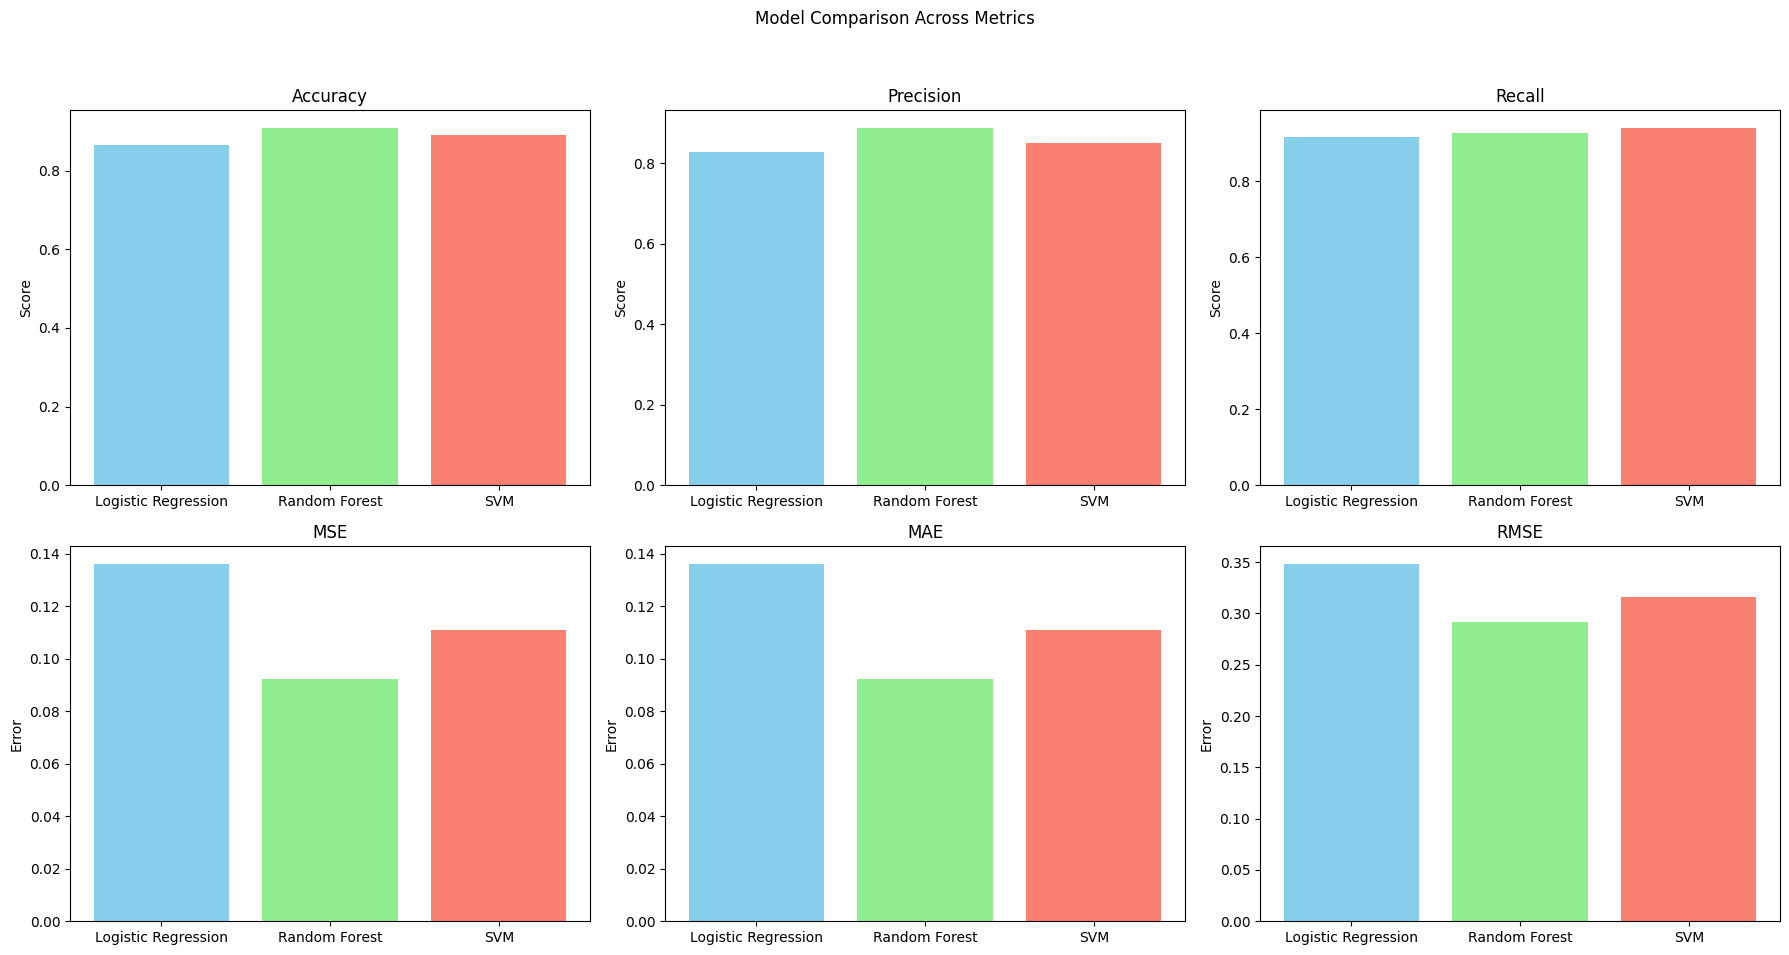

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, mean_squared_error, mean_absolute_error, 
    precision_score, recall_score, confusion_matrix
)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Prepare a dictionary to store metrics for each model
metrics_dict = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "RMSE": [],
    "MSE": [],
    "MAE": []
}

# Define models to be evaluated
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

# Loop through each model, train it, and store metrics
for model_name, model in models.items():
    # Initialize lists to accumulate metrics per sport
    accuracy_list, precision_list, recall_list, rmse_list, mse_list, mae_list = [], [], [], [], [], []

    # Group the data by sport
    for sport in df_scaled['Sport'].unique():
        df_sport = df_scaled[df_scaled['Sport'] == sport]

        if df_sport.shape[0] > 0:  # Check if the sport group has enough data
            # Select features and target variable
            X = df_sport[['Scaled_BMI', 'Scaled_Age', 'Country']]
            X = pd.get_dummies(X, columns=['Country'], prefix=['Country'])
            y = df_sport['Medal_Indicator']

            # Ensure there are at least two classes for SMOTE
            if len(np.unique(y)) > 1:
                # Apply SMOTE
                minority_class_size = np.min(np.bincount(y))
                k_neighbors = min(5, minority_class_size - 1) if minority_class_size > 1 else 1
                smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
                X_resampled, y_resampled = smote.fit_resample(X, y)

                # Split into training and testing sets
                X_train, X_test, y_train, y_test = train_test_split(
                    X_resampled, y_resampled, test_size=0.2, random_state=42
                )

                # Train the model
                model.fit(X_train, y_train)
                
                # Make predictions
                y_pred = model.predict(X_test)
                
                # Calculate metrics
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, zero_division=1)
                recall = recall_score(y_test, y_pred, zero_division=1)
                mse = mean_squared_error(y_test, y_pred)
                mae = mean_absolute_error(y_test, y_pred)
                rmse = np.sqrt(mse)

                # Append metrics to lists
                accuracy_list.append(accuracy)
                precision_list.append(precision)
                recall_list.append(recall)
                mse_list.append(mse)
                mae_list.append(mae)
                rmse_list.append(rmse)

    # Store average metrics for the current model
    metrics_dict["Model"].append(model_name)
    metrics_dict["Accuracy"].append(np.mean(accuracy_list))
    metrics_dict["Precision"].append(np.mean(precision_list))
    metrics_dict["Recall"].append(np.mean(recall_list))
    metrics_dict["MSE"].append(np.mean(mse_list))
    metrics_dict["MAE"].append(np.mean(mae_list))
    metrics_dict["RMSE"].append(np.mean(rmse_list))

# Convert the dictionary to a DataFrame for easier visualization
metrics_df = pd.DataFrame(metrics_dict)
print(metrics_df)

# Plot the metrics for visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Model Comparison Across Metrics")

# Accuracy plot
axes[0, 0].bar(metrics_df["Model"], metrics_df["Accuracy"], color=['skyblue', 'lightgreen', 'salmon'])
axes[0, 0].set_title("Accuracy")
axes[0, 0].set_ylabel("Score")

# Precision plot
axes[0, 1].bar(metrics_df["Model"], metrics_df["Precision"], color=['skyblue', 'lightgreen', 'salmon'])
axes[0, 1].set_title("Precision")
axes[0, 1].set_ylabel("Score")

# Recall plot
axes[0, 2].bar(metrics_df["Model"], metrics_df["Recall"], color=['skyblue', 'lightgreen', 'salmon'])
axes[0, 2].set_title("Recall")
axes[0, 2].set_ylabel("Score")

# MSE plot
axes[1, 0].bar(metrics_df["Model"], metrics_df["MSE"], color=['skyblue', 'lightgreen', 'salmon'])
axes[1, 0].set_title("MSE")
axes[1, 0].set_ylabel("Error")

# MAE plot
axes[1, 1].bar(metrics_df["Model"], metrics_df["MAE"], color=['skyblue', 'lightgreen', 'salmon'])
axes[1, 1].set_title("MAE")
axes[1, 1].set_ylabel("Error")

# RMSE plot
axes[1, 2].bar(metrics_df["Model"], metrics_df["RMSE"], color=['skyblue', 'lightgreen', 'salmon'])
axes[1, 2].set_title("RMSE")
axes[1, 2].set_ylabel("Error")

# Show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [59]:
##user input

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming df_scaled is already loaded and prepared
# This part trains the model based on the given training data (same as the previous code)
# Define model (you can choose any of these models)
model = RandomForestClassifier(random_state=42)  # You can use LogisticRegression or SVC here

# Select features and target variable for training
X = df_scaled[['Scaled_BMI', 'Scaled_Age', 'Country']]
X = pd.get_dummies(X, columns=['Country'], prefix=['Country'])
y = df_scaled['Medal_Indicator']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Now we can write the function to get user input and predict

def predict_with_user_input():
    # Get user input
    bmi = float(input("Enter your BMI (Scaled): "))
    age = int(input("Enter your age (Scaled): "))
    country = input("Enter your country: ").strip()

    # Prepare input data
    input_data = pd.DataFrame({
        'Scaled_BMI': [bmi],
        'Scaled_Age': [age],
        'Country': [country]
    })
    
    # Convert 'Country' column to dummy variables (one-hot encoding)
    input_data = pd.get_dummies(input_data, columns=['Country'], prefix=['Country'])

    # Ensure the input data matches the feature space of the trained model (same columns)
    for col in X_train.columns:
        if col not in input_data.columns:
            input_data[col] = 0
    input_data = input_data[X_train.columns]  # Reorder columns to match training data
    
    # Make prediction
    prediction = model.predict(input_data)
    
    # Output the prediction
    if prediction[0] == 1:
        print("Prediction: Likely to win a medal!")
    else:
        print("Prediction: Unlikely to win a medal.")

# Call the function to take input from the user and predict
predict_with_user_input()


KeyboardInterrupt: Interrupted by user

Sport: Archery
Training MSE: 0.4939
Training MAE: 0.4939
Training RMSE: 0.7028
Testing MSE: 0.5242
Testing MAE: 0.5242
Testing RMSE: 0.7240
Testing Accuracy: 0.4758
Testing Precision: 0.4758
Testing Recall: 1.0000
Confusion Matrix:
 [[ 0 65]
 [ 0 59]]
Sport: Artistic Gymnastics
Training MSE: 0.4969
Training MAE: 0.4969
Training RMSE: 0.7049
Testing MSE: 0.5123
Testing MAE: 0.5123
Testing RMSE: 0.7158
Testing Accuracy: 0.4877
Testing Precision: 0.4877
Testing Recall: 1.0000
Confusion Matrix:
 [[  0 291]
 [  0 277]]
Sport: Athletics
Training MSE: 0.4959
Training MAE: 0.4959
Training RMSE: 0.7042
Testing MSE: 0.5165
Testing MAE: 0.5165
Testing RMSE: 0.7187
Testing Accuracy: 0.4835
Testing Precision: 0.4835
Testing Recall: 1.0000
Confusion Matrix:
 [[  0 766]
 [  0 717]]
Sport: Badminton
Training MSE: 0.4850
Training MAE: 0.4850
Training RMSE: 0.6964
Testing MSE: 0.5596
Testing MAE: 0.5596
Testing RMSE: 0.7481
Testing Accuracy: 0.4404
Testing Precision: 0.4404
Testing Recall: 1.0000
Confus

Enter your height (in cm):  120
Enter your weight (in kg):  60
Enter your age:  25
Enter your BMI:  2.4
Enter your Olympic year:  2004
Enter your country:  china


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Country_china
